In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/My Drive/Deteksi Stunting/dataset_berat_balita.csv")
df

Mounted at /content/drive


,Umur (bulan),Berat Badan (kg),Jenis Kelamin,Status Gizi
0,0,1,perempuan,severely underweight
1,0,6,perempuan,overweight
2,0,1,perempuan,severely underweight
3,0,6,perempuan,overweight
4,0,4,perempuan,normal
...,...,...,...,...
122117,60,18,laki-laki,normal
122118,60,21,laki-laki,normal
122119,60,25,laki-laki,overweight
122120,60,19,laki-laki,normal


**Pengkodean (mapping) jenis kelamin dan status gizi**

In [3]:
df['Jenis Kelamin'] = df['Jenis Kelamin'].map({'laki-laki': 0, 'perempuan': 1})

df['Status Gizi'] = df['Status Gizi'].map({'severely underweight': 0, 'underweight': 1, 'normal': 2, 'overweight': 3})
df

,Umur (bulan),Berat Badan (kg),Jenis Kelamin,Status Gizi
0,0,1,1,0
1,0,6,1,3
2,0,1,1,0
3,0,6,1,3
4,0,4,1,2
...,...,...,...,...
122117,60,18,0,2
122118,60,21,0,2
122119,60,25,0,3
122120,60,19,0,2


In [4]:
X = df.iloc[:, 1:6]
X = df.drop('Status Gizi', axis=1)
y = df['Status Gizi']


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Training
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Langkah pertama: scaling fitur
    ('svm', SVC(kernel='rbf', C=10, gamma=1, decision_function_shape='ovo'))  # Langkah kedua: model SVM
])

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan nilai akurasi setiap fold
accuracy_scores = []

# Lakukan cross-validation
for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Latih pipeline pada data pelatihan fold
    pipeline.fit(X_train_fold, y_train_fold)

    # Prediksi pada data validasi fold
    y_pred_fold = pipeline.predict(X_val_fold)

    # Evaluasi kinerja model
    accuracy_fold = accuracy_score(y_val_fold, y_pred_fold)
    accuracy_scores.append(accuracy_fold)

# Cetak nilai akurasi setiap fold
for i, accuracy_fold in enumerate(accuracy_scores):
    print(f"Fold {i+1} Accuracy: {accuracy_fold * 100:.2f}%")

# Cetak rata-rata akurasi
print(f"Mean Accuracy: {sum(accuracy_scores) / len(accuracy_scores)* 100:.2f}%")

print(classification_report(y_val_fold.values.reshape(-1, 1), y_pred_fold))
print(f"Akurasi model: {accuracy_fold * 100:.2f}%")

Fold 1 Accuracy: 94.75%
Fold 2 Accuracy: 94.95%
Fold 3 Accuracy: 94.66%
Fold 4 Accuracy: 95.14%
Fold 5 Accuracy: 94.92%
Mean Accuracy: 94.88%
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5167
           1       0.76      0.77      0.77      1368
           2       0.94      0.94      0.94      5487
           3       0.98      0.98      0.98      7517

    accuracy                           0.95     19539
   macro avg       0.91      0.91      0.91     19539
weighted avg       0.95      0.95      0.95     19539

Akurasi model: 94.92%


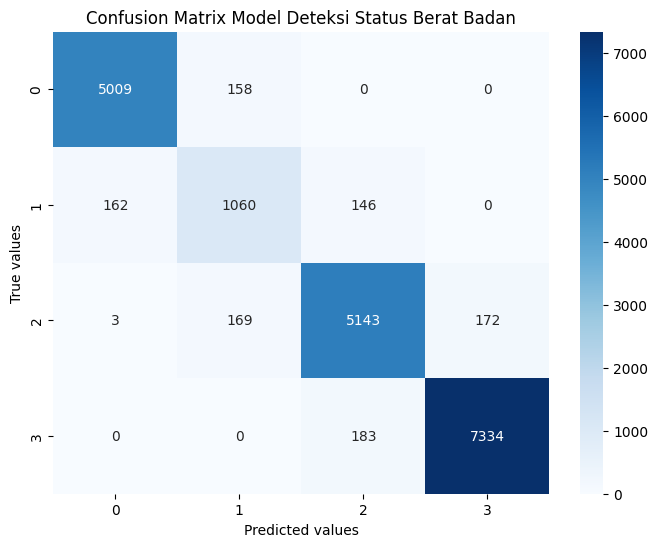

In [7]:

cm = confusion_matrix(y_val_fold, y_pred_fold)

plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion Matrix Model Deteksi Status Berat Badan')
plt.show()

In [ ]:
df = pd.DataFrame({'kelas': y_train})

# Menghitung jumlah data per kelas
jumlah_data_per_kelas = df['kelas'].value_counts().to_dict()

print("Jumlah data per kelas:")
print(jumlah_data_per_kelas)

Jumlah data per kelas:
{3: 37584, 2: 27435, 0: 25836, 1: 6842}


In [ ]:
df = pd.DataFrame({'Status Gizi': y_test})

# Menghitung jumlah data per kelas
jumlah_data_per_kelas = df['Status Gizi'].value_counts().to_dict()

print("Jumlah data per kelas:")
print(jumlah_data_per_kelas)

Jumlah data per kelas:
{3: 9395, 2: 6928, 0: 6402, 1: 1700}


In [8]:
import joblib

model_path = '/content/drive/My Drive/Deteksi Stunting/model_deteksi_status_berat_badan.pkl'

joblib.dump(pipeline, model_path)

['/content/drive/My Drive/Deteksi Stunting/model_deteksi_status_berat_badan.pkl']

In [25]:
import joblib
from sklearn.model_selection import cross_val_score
model_path = '/content/drive/My Drive/Deteksi Stunting/model_deteksi_status_berat_badan.pkl'

test_model = joblib.load(model_path)

test_model_gizi = pd.DataFrame({'Umur (bulan)': [45],'Berat Badan (kg)':[41], 'Jenis Kelamin': [1] })

y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

pred = pipeline.predict(test_model_gizi)
print("Predicted Score = {}".format(np.array(pred)))

Training Accuracy: 0.949179606333869
Test Accuracy: 0.9471443193449335
Predicted Score = [3]
